In [26]:
from pyomo.environ import *
import matplotlib.pyplot as plt
import numpy as np
import random 

In [27]:
model = AbstractModel()
model.N =Param(mutable=True, default=15) 
model.i = RangeSet(1,model.N)
def initval(model,i):
    return random.uniform(0,1)

def initvalM(model,i):
    return 0.2*random.uniform(0,1)
model.Xloc=Param(model.i,  within=NonNegativeReals, initialize=initval,mutable=True)
model.Yloc=Param(model.i,  within=NonNegativeReals, initialize=initval, mutable=True)
model.Mass=Param(model.i,  within=NonNegativeReals, initialize=initvalM, mutable=True)

model.x = Var(bounds=(0,1), within=NonNegativeReals, initialize=0.1)
model.y = Var(bounds=(0,1), within=NonNegativeReals, initialize=0.3)
def rule_C2(model):
    return model.x==sum(model.Xloc[i]*model.Mass[i] for i in model.i)/sum(model.Mass[i] for i in model.i)
model.C2   = Constraint(rule=rule_C2)
def rule_C3(model):
    return model.y==sum(model.Yloc[i]*model.Mass[i] for i in model.i)/sum(model.Mass[i] for i in model.i)
model.C3   = Constraint(rule=rule_C3)
model.obj1 = Objective(expr=model.x , sense=maximize)


In [30]:
opt = SolverFactory('glpk')
model.N=6
instance = model.create_instance()

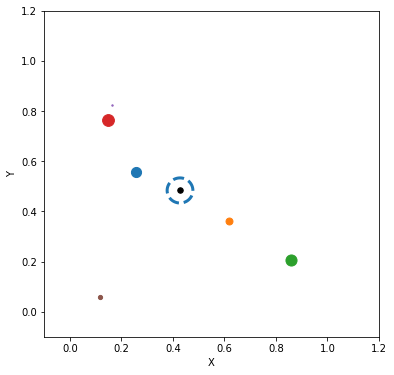

In [31]:
fig = plt.figure(figsize=(6,6))
for i in instance.i:
    plt.scatter(value(instance.Xloc[i]),value(instance.Yloc[i]),s=2000*value(instance.Mass[i]))
    
results = opt.solve(instance) # solves and updates instance
plt.scatter(value(instance.x),value(instance.y),color='black',s=30)
theta=np.linspace(0,2*np.pi,100)
Xc=value(instance.x)+0.05*np.cos(theta)
Yc=value(instance.y)+0.05*np.sin(theta)
plt.plot(Xc,Yc,'--',lw=3)
#plt.axis('off')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-0.1,1.2)
plt.ylim(-0.1,1.2)
plt.show()